In [19]:
import pandas as pd
from PIL import ImageDraw, Image
import numpy as np
from sklearn.utils import shuffle
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
#pd.options.mode.chained_assignment = None
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.max_rows', 100)

In [20]:
# -*- encoding: utf-8 -*-
import time
import theano
import tensorflow as tf
import tensorflow
import sklearn
# import seaborn as sns; sns.set(style="ticks", color_codes=True)
import scipy
# import pydotplus
# import pydot
import pandas as pd
import pandas
import os
import numpy as np
import numpy
# import matplotlib.pyplot as plt
# import matplotlib
import keras
import h5py
# import graphviz
from sklearn.utils import shuffle
from sklearn.svm import SVR
from sklearn.cross_validation import train_test_split
from scipy.misc import imsave
from PIL import ImageDraw, Image # pip install Pillow
from pandas.io.parsers import read_csv
from keras.utils.vis_utils import model_to_dot
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.models import Sequential
from keras.models import model_from_json
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout
from keras.layers import Flatten
from keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, Flatten, Dropout
from keras.layers import Dense
from keras.layers import Convolution2D, Activation, MaxPooling2D, Dropout
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.callbacks import LearningRateScheduler, EarlyStopping
from keras.callbacks import LearningRateScheduler
from keras.callbacks import EarlyStopping, LearningRateScheduler
from keras import backend as K
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.callbacks import EarlyStopping, LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator
from collections import OrderedDict
from sklearn.cross_validation import train_test_split
# from IPython.display import SVG
# from collections import OrderedDict

In [2]:
FTRAIN = '../data/training.csv'
FTEST = '../data/test.csv'

In [3]:
df = pd.read_csv(FTRAIN)

# Visualize the NA data in DataFrame

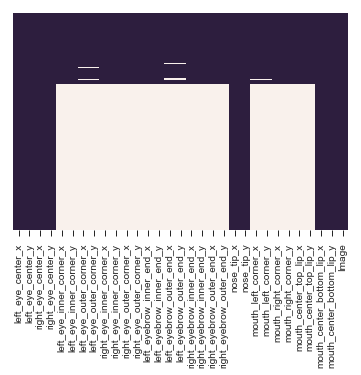

In [5]:
sns.heatmap(df.isnull() == False, cbar=False, yticklabels=False)

# MODEL : CNN - 1

In [ ]:

# from __future__ import print_function

def load(test=False, cols=None):

    fname = FTEST if test else FTRAIN
    df = read_csv(os.path.expanduser(fname))  # load pandas datafram|e

    # The Image column has pixel values separated by space; convert
    # the values to numpy arrays:
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

    if cols:  # get a subset of columns
        df = df[list(cols) + ['Image']]

    # print(df.count())  # prints the number of values for each column
    df = df.dropna()  # drop all rows that have missing values in them

    X = np.vstack(df['Image'].values) / 255.  # scale pixel values to [0, 1]
    X = X.astype(np.float32)

    if not test:  # only FTRAIN has any target columns
        y = df[df.columns[:-1]].values
        y = (y - 48) / 48  # scale target coordinates to [-1, 1]
        X, y = shuffle(X, y, random_state=42)  # shuffle train data
        y = y.astype(np.float32)
    else:
        y = None

    return X, y


def load2d(test=False, cols=None):
    X, y = load(test=test, cols=cols)
    X = X.reshape(-1, 1, 96, 96)

    return X, y

# coding:utf-8

def rmse(target, y_predicted):
    rmse = K.sqrt(K.mean(K.square(y_predicted - target))) * 48
    return rmse

# If you use gpu when using theano backend
# import theano
# theano.config.device = 'gpu'
# theano.config.floatX = 'float32'

SPECIALIST_SETTINGS = [
    dict(
        columns=(
            'left_eye_center_x', 'left_eye_center_y',
            'right_eye_center_x', 'right_eye_center_y',
        ),
        flip_indices=((0, 2), (1, 3)),
    ),

    dict(
        columns=(
            'nose_tip_x', 'nose_tip_y',
        ),
        flip_indices=(),
    ),

    dict(
        columns=(
            'mouth_left_corner_x', 'mouth_left_corner_y',
            'mouth_right_corner_x', 'mouth_right_corner_y',
            'mouth_center_top_lip_x', 'mouth_center_top_lip_y',
        ),
        flip_indices=((0, 2), (1, 3)),
    ),

    dict(
        columns=(
            'mouth_center_bottom_lip_x',
            'mouth_center_bottom_lip_y',
        ),
        flip_indices=(),
    ),

    dict(
        columns=(
            'left_eye_inner_corner_x', 'left_eye_inner_corner_y',
            'right_eye_inner_corner_x', 'right_eye_inner_corner_y',
            'left_eye_outer_corner_x', 'left_eye_outer_corner_y',
            'right_eye_outer_corner_x', 'right_eye_outer_corner_y',
        ),
        flip_indices=((0, 2), (1, 3), (4, 6), (5, 7)),
    ),

    dict(
        columns=(
            'left_eyebrow_inner_end_x', 'left_eyebrow_inner_end_y',
            'right_eyebrow_inner_end_x', 'right_eyebrow_inner_end_y',
            'left_eyebrow_outer_end_x', 'left_eyebrow_outer_end_y',
            'right_eyebrow_outer_end_x', 'right_eyebrow_outer_end_y',
        ),
        flip_indices=((0, 2), (1, 3), (4, 6), (5, 7)),
    ),
]


class FlippedImageDataGenerator(ImageDataGenerator):
    flip_indices = [(0, 2), (1, 3), (4, 8), (5, 9),
                    (6, 10), (7, 11), (12, 16), (13, 17),
                    (14, 18), (15, 19), (22, 24), (23, 25)]

    def next(self):
        X_batch, y_batch = super(FlippedImageDataGenerator, self).next()
        batch_size = X_batch.shape[0]
        indices = np.random.choice(batch_size, batch_size / 2, replace=False)
        X_batch[indices] = X_batch[indices, :, :, ::-1]

        if y_batch is not None:
            y_batch[indices, ::2] = y_batch[indices, ::2] * -1

            for a, b in self.flip_indices:
                y_batch[indices, a], y_batch[indices, b] = (
                    y_batch[indices, b], y_batch[indices, a]
                )

        return X_batch, y_batch


    # fit of specialists
def fit_specialists():
    specialists = OrderedDict()
    start = 0.03
    stop = 0.001
    #np_epoch = 10000
    nb_epoch = 500
    PRETRAIN = False
    learning_rate = np.linspace(start, stop, nb_epoch)

    for setting in SPECIALIST_SETTINGS:
        cols = setting['columns']
        X, y = load2d(cols=cols)
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                test_size=0.2, random_state=42)
        model = cnn_model()
        if PRETRAIN:
            model.load_weights('my_cnn_model_weights.h5')
        model.layers.pop()
        model.outputs = [model.layers[-1].output]
        model.layers[-1].outbound_nodes = []
        model.add(Dense(len(cols)))

        sgd = SGD(lr=start, momentum=0.9, nesterov=True)
        model.compile(loss='mse', optimizer=sgd)
        lr_decay = LearningRateScheduler(lambda epoch: float(learning_rate[epoch]))
        early_stop = EarlyStopping(patience=100)

        flipgen = FlippedImageDataGenerator()
        flipgen.flip_indices = setting['flip_indices']

        print('Training model for columns {} for {} epochs'.format(cols, nb_epoch))

        hist = model.fit_generator(flipgen.flow(X_train, y_train),
                                samples_per_epoch=X_train.shape[0],
                                nb_epoch=nb_epoch,
                                validation_data=(X_test, y_test),
                                callbacks=[ler_decay, early_stop])
        #model save - weight, loss, val_loss
        model.save_weights('my_cnn_model_{}_weights.h5'.format(cols[0]))
        np.savetxt('my_cnn_model_{}_loss.csv'.format(cols[0]), hist.history['loss'])
        np.savetxt('my_cnn_model_{}_val_loss.csv'.format(cols[0]), hist.history['val_loss'])

        specialists[cols] = model




#모델평가.
'''
def model_evaluate():
    loss_and_metrics = model.evaluate(x_test, y_test, batch_size = 32)
    print('')
    print('loss : ' + str(loss_and_metrics[0]))
    print('accuracy :' + str(loss_and_metrics[1]))
    print('--evluate--')
    scores = model.evaluate_generator(model.fit_generator, steps = 5)
    print("%s: %.2f%%"%(model.metrics_name[1], scores[1]*100))

    return loss_and_metrics
'''



#plot
'''
def plot_loss():
    loss = np.loadtxt('my_cnn_model_loss.csv')
    val_loss = np.loadtxt('my_cnn_model_val_loss.csv')

    plt.plot(loss, linewidth=3, label='train')
    plt.plot(val_loss, linewidth=3, label='valid')
    plt.grid()
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    #plt.ylim(1e-3, 1e-2)
    plt.yscale('log')
    plt.show()
'''


In [ ]:
def cnn_model():

    model = Sequential()

# model.add(Conv2D(32, kernel_size(3, 3), input_shape=(96, 96,1)))
# 컨볼루션 레이어 : 입력이미지 크기 96x96, 입력이미지 1개, 필터크기 3x3, 필터수 32개, 경게타입 same. 활성화 함수 relu
    model.add(Conv2D(32, kernel_size=(3,3),padding='same',activation='relu', input_shape=(1,96,96)))
#맥스풀링 레이어:풀크기 2x2
    model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="th"))
    model.add(Dropout(0.1))
# 컨볼루션 레이어 : 필터 크기 2 x 2, 필터 수 64개, 활성화 함수 ‘relu’
    model.add(Conv2D(64, (2, 2),padding='same', activation='relu'))
    #model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="th"))
    model.add(Dropout(0.2))

# 컨볼루션 레이어 : 필터 크기 2 x 2, 필터 수 128개, 활성화 함수 ‘relu’
    model.add(Conv2D(128, (2, 2), padding = 'same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), dim_ordering="th"))
    model.add(Dropout(0.3))

#플래튼 : 일차원으로 바꾸어준다.
    model.add(Flatten())

# 댄스 레이어 : 출력 뉴런 수 1000개, 활성화 함수 ‘relu’
    model.add(Dense(1000))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
# 댄스 레이어 : 출력 뉴런 수 1000개, 활성화 함수 ‘relu’
    model.add(Dense(1000))
    model.add(Activation('relu'))
# 댄스 레이어 : 출력 뉴런 수 30개, 활성화 함수 ‘softmax’
    model.add(Dense(30))
    # model.add(Activation('softmax'))

    return model

def fit_model():
    start = 0.03
    stop = 0.001
    #np_epoch = 10000
    nb_epoch = 1000
    PRETRAIN = False
    learning_rate = np.linspace(start, stop, nb_epoch)

    X, y = load2d()
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                test_size=0.2, random_state=42)

    model = cnn_model()
    if PRETRAIN:
        model.load_weights('my_cnn_model_weights.h5')
    sgd = SGD(lr=start, momentum=0.9, nesterov=True)
    model.compile(loss='mse', optimizer=sgd, metrics = [rmse])
    change_lr = LearningRateScheduler(lambda epoch: float(learning_rate[epoch]))
    early_stop = EarlyStopping(patience=100)

    flipgen = FlippedImageDataGenerator()

    hist = model.fit_generator(flipgen.flow(X_train, y_train),
                            samples_per_epoch=X_train.shape[0],
                            nb_epoch=nb_epoch,
                            validation_data=(X_test, y_test),
                            callbacks=[change_lr, early_stop])

    #model save - weight, loss, val_loss
    model.save_weights('my_cnn_model_weights.h5', overwrite=True)
    np.savetxt('my_cnn_model_loss.csv', hist.history['loss'])
    np.savetxt('my_cnn_model_val_loss.csv', hist.history['val_loss'])


In [ ]:

def main():
    fit_model()
    # fit_specialists()
    # model_evaluate()
    plot_loss()

if __name__ == '__main__':
    main()

# cnn-1
# epoch 1000
### rsme 2.6518?

In [10]:
def plot_loss():
    loss = np.loadtxt('my_cnn_model_loss_cnn1.csv')
    val_loss = np.loadtxt('my_cnn_model_val_loss_cnn1.csv')

    plt.plot(loss, linewidth=3, label='train')
    plt.plot(val_loss, linewidth=3, label='valid')
    plt.grid()
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    #plt.ylim(1e-3, 1e-2)
    plt.yscale('log')
    plt.show()
    
    

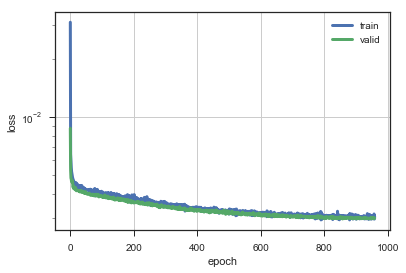

In [11]:
plot_loss()

# cnn-1
# epoch 3000

In [5]:
def plot_loss():
    loss = np.loadtxt('C:/Users/adonist/git/1120 facial/epoch3000/my_cnn_model_loss.csv')
    val_loss = np.loadtxt('C:/Users/adonist/git/1120 facial/epoch3000/my_cnn_model_val_loss.csv')

    plt.plot(loss, linewidth=3, label='train')
    plt.plot(val_loss, linewidth=3, label='valid')
    plt.grid()
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    #plt.ylim(1e-3, 1e-2)
    plt.yscale('log')
    plt.show()

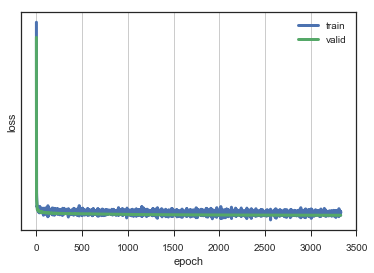

In [6]:
plot_loss()

# cnn29


In [21]:
def plot_loss():
    loss = np.loadtxt('my_cnn_model_loss_cnn1.csv')
    val_loss = np.loadtxt('my_cnn_model_val_loss_cnn1.csv')

    plt.plot(loss, linewidth=3, label='train')
    plt.plot(val_loss, linewidth=3, label='valid')
    plt.grid()
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    #plt.ylim(1e-3, 1e-2)
    plt.yscale('log')
    plt.show()
    

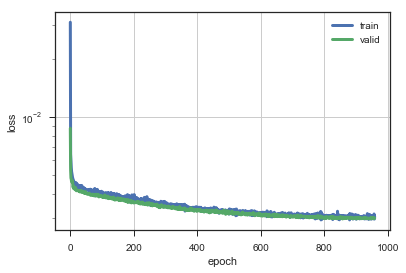

In [22]:
plot_loss()

In [ ]:
# my_cnn_model_left_eye_center_x_loss

In [ ]:
def plot_loss():
    loss = np.loadtxt('my_cnn_model_left_eye_center_x_loss_cnn.csv')
    val_loss = np.loadtxt('my_cnn_model_left_eye_center_x_loss.csv')

    plt.plot(loss, linewidth=3, label='train')
    plt.plot(val_loss, linewidth=3, label='valid')
    plt.grid()
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    #plt.ylim(1e-3, 1e-2)
    plt.yscale('log')
    plt.show()
    
    

In [ ]:
def plot_loss():
    loss = np.loadtxt('my_cnn_model_loss_cnn1.csv')
    val_loss = np.loadtxt('my_cnn_model_val_loss_cnn1.csv')

    plt.plot(loss, linewidth=3, label='train')
    plt.plot(val_loss, linewidth=3, label='valid')
    plt.grid()
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    #plt.ylim(1e-3, 1e-2)
    plt.yscale('log')
    plt.show()
    
    

In [ ]:
def plot_loss():
    loss = np.loadtxt('my_cnn_model_loss_cnn1.csv')
    val_loss = np.loadtxt('my_cnn_model_val_loss_cnn1.csv')

    plt.plot(loss, linewidth=3, label='train')
    plt.plot(val_loss, linewidth=3, label='valid')
    plt.grid()
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    #plt.ylim(1e-3, 1e-2)
    plt.yscale('log')
    plt.show()
    
    

In [ ]:
def plot_loss():
    loss = np.loadtxt('my_cnn_model_loss_cnn1.csv')
    val_loss = np.loadtxt('my_cnn_model_val_loss_cnn1.csv')

    plt.plot(loss, linewidth=3, label='train')
    plt.plot(val_loss, linewidth=3, label='valid')
    plt.grid()
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    #plt.ylim(1e-3, 1e-2)
    plt.yscale('log')
    plt.show()
    
    

In [ ]:
def plot_loss():
    loss = np.loadtxt('my_cnn_model_loss_cnn1.csv')
    val_loss = np.loadtxt('my_cnn_model_val_loss_cnn1.csv')

    plt.plot(loss, linewidth=3, label='train')
    plt.plot(val_loss, linewidth=3, label='valid')
    plt.grid()
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    #plt.ylim(1e-3, 1e-2)
    plt.yscale('log')
    plt.show()
    
    